In [1]:
import json
from misc import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
def plot_performance(d, title, wv=True, legend=True):
    h = [
        Patch(color="blue", label="Training set"),
        Patch(color="green", label="Test set"),
        Patch(color="red", label="Perfect prediction"),
    ]
    if wv:
        h.append(Patch(color="purple", label="Augmented pseudoexamples"))
        plt.scatter(d["train.aug.reals"], d["train.aug.preds"], color="purple")
    plt.plot(d["train.aug.reals"], d["train.aug.reals"], color="red")
    plt.scatter(d["test.reals"], d["test.preds"], color="green")
    plt.scatter(d["train.reals"], d["train.preds"], color="blue")
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("Real AUROCs")
    plt.ylabel("Predicted AUROCs")
    if legend:
        plt.legend(
            loc="best",
            handles=h
        )
    plt.title(title)

In [3]:
%%bash

ls ../results/ | grep joint

joint_wv.joblib
joint_wv.json
joint_wv.py


In [4]:
with open("../results/en_study.pkl_wv.json", "r") as oh:
    english_results_wv = json.load(oh)
with open("../results/en_study.pkl_1hot.json", "r") as oh:
    english_results_1hot = json.load(oh)
with open("../results/ru_study.pkl_wv.json", "r") as oh:
    russian_results_wv = json.load(oh)
with open("../results/ru_study.pkl_1hot.json", "r") as oh:
    russian_results_1hot = json.load(oh)
with open("../results/joint_wv.json", "r") as oh:
    joint_results = json.load(oh)

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

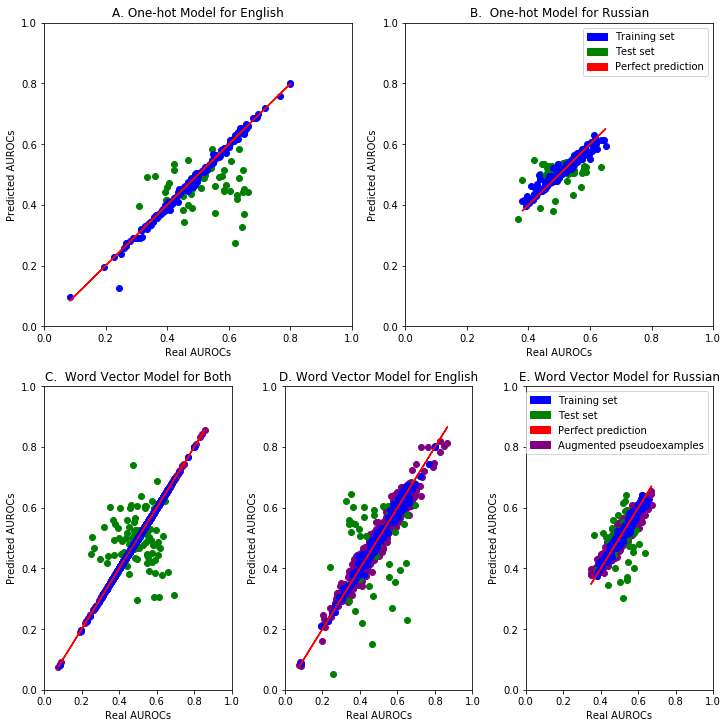

In [6]:
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 6)
en_ohot = fig.add_subplot(gs[0,0:3])
plot_performance(
    english_results_1hot, "A. One-hot Model for English", False, False
)
ru_ohot = fig.add_subplot(gs[0,3:])
plot_performance(
    russian_results_1hot, "B.  One-hot Model for Russian", False
)
joint_wv = fig.add_subplot(gs[1,0:2])
plot_performance(
    joint_results, "C.  Word Vector Model for Both", True, False
)
en_wv = fig.add_subplot(gs[1,2:4])
plot_performance(
    english_results_wv, "D. Word Vector Model for English", True, False
)
ru_wv = fig.add_subplot(gs[1,4:])
plot_performance(
    russian_results_wv, "E. Word Vector Model for Russian", True
)